## A. Agenda: 
- 6:05 - 6:45 - lecture: Hyper parameter theory
- 6:45 - 7:30 - work time
- 7:30 - 8:15 - lecture: Feature importance
- 8:15 - 9 - work time

## B. Interesting links / Resources

Resources:
- [Slides for Bayesian method](http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/slides/lec21.pdf)
- [Grid search overview](http://scikit-learn.org/stable/modules/grid_search.html)
- [website: cool optimization service](https://sigopt.com/pricing)
- [article](https://bmcbioinformatics.biomedcentral.com/track/pdf/10.1186/1471-2105-8-25?site=bmcbioinformatics.biomedcentral.com)

|    | Learning Objectives                                                                           |
| -- | --------------------------------------------------------------------------------------------- |
| A. | Have conceptual and practical understanding, be able to list out the steps                    |
| B. | Know how to use GridSearchCV and RandomSearchCV                                               |
| C. | Have applied GridSearchCV and RandomSearchCV on a dataset on a model you’ve never used before |


## C. Overview
### Problem Statement:

- We have some learner M with features X and hyper parameters Λ with loss function f(Λ|X).
- Loss function is your choice. You optimize by minimizing it or maximize it. This is determined by your goals for the model.


### Definitions:

- Hyper Parameters: 
  - λ a model parameter that controls the complexity of a model. In other cases affect thresholds. A model may have many hyper parameters Λ refers to a set of hyper parameters.
- Optimization Criteria:
  - Your cost function selected from applicable error metrics. These can be (list here):
    - LogLoss: Penalizes false classifcation. Minimization of this means maximizing accuracy. Needs a "probabilty " for each classificaiton. Heavily penalizes those with very  incorrect classification.

    - RMSE: Root Mean Squared error = sqrt(mean((y_true - y_pred)**2))
    - Accuracy: Accuracy is (TP + TN) / (TP + TN + FN + FP).
    - Precision:  TP / (TP + FP)
    - Recall: TP / Total Trues
    - F1: Harmonic mean of Precision and Recall
    - AUC: True Positive Rate on Y axis, False Positive Rate on X axis. Each point is a confusion matrix. Probability treshold will change the point you are at, that's how you plot. 
  - Which one? and why?
- What’s the industry standard?
  - Random. 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from scipy.stats import randint as sp_randint
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('./data/titanic_2.csv')
df = pd.concat([df,pd.get_dummies(df.PClass),pd.get_dummies(df.Title),pd.get_dummies(df.Sex)],  1)
df = df.drop(['Sex','PClass','Title'],1)
X = df.drop('Survived',1)
y = df.Survived
#train_X, train_y, test_X, test_ytrain_test_split(X,y, train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 100)

In [11]:
sum(df.Survived)/len(df)

0.3427265803503427

In [7]:
df.head()

,Age,Survived,1st,2nd,3rd,Miss,Mr,Mrs,Nothing,female,male
0,29.00,1,1,0,0,1,0,0,0,1,0
1,2.00,0,1,0,0,1,0,0,0,1,0
2,30.00,0,1,0,0,0,1,0,0,0,1
3,25.00,0,1,0,0,0,0,1,0,1,0
4,0.92,1,1,0,0,0,0,0,1,0,1


# Random Forest:

	
- n_estimators: integer, optional (default=10), The number of trees in the forest.
- criterion: (default=”gini”) The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- max_features:optional (default=”auto”) The number of features to consider when looking for the best split:
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: (default=2) The minimum number of samples required to split an internal node:
- min_samples_leaf:  (default=1)The minimum number of samples required to be at a leaf node.

### Baseline

In [8]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.79695431472081213

## Defining Ranges

In [36]:
grid_search.best_estimator_.feature_importances_

array([ 0.24216165,  0.05272873,  0.03158183,  0.15454116,  0.01605891,
        0.05306818,  0.02407839,  0.01830128,  0.21511992,  0.19235995])

In [14]:
def explore_grid (param_grid):
    clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)
    grid_explore = GridSearchCV(
        clf,
        param_grid,
        cv=4,
        scoring='accuracy')
    grid_explore.fit(X_train, y_train)
    return pd.DataFrame(grid_explore.grid_scores_)[['parameters','mean_validation_score']]

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


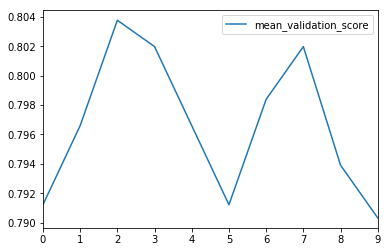

In [16]:
max_depth_explore = explore_grid([{"max_features": np.arange(1,11)}])
max_depth_explore.plot()

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


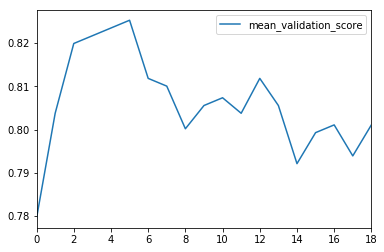

In [17]:
max_depth_explore = explore_grid([{"max_depth": np.arange(1,20)}])
max_depth_explore.plot()

### Grid Search
Your turn: Define feature space

In [19]:
param_grid = [{
    "max_depth": [3,4,5,6,7,10,11,12,13,14],
    "max_features": [2,3,4,5,6,7,8]
}]


clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=4,
    scoring='accuracy')


grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7, 10, 11, 12, 13, 14], 'max_features': [2, 3, 4, 6, 7, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
pd.DataFrame({'vars':X_test.columns,'imp':grid_search.best_estimator_.feature_importances_}).sort_values('imp', ascending = False)

,imp,vars
0,0.242162,Age
8,0.215120,female
9,0.192360,male
3,0.154541,3rd
5,0.053068,Mr
1,0.052729,1st
2,0.031582,2nd
6,0.024078,Mrs
7,0.018301,Nothing
4,0.016059,Miss


## Random Search
Your turn: Define feature space

In [30]:

param_dist = {"max_depth": np.arange(3,14),
              "max_features":np.arange(2,8)}

clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)

# run randomized search
n_iter_search = 15

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   cv=4,
                                   n_iter=n_iter_search)
random_search.fit(X, y)


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), 'max_features': array([2, 3, 4, 5, 6, 7])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

# Check the best Estimator

In [31]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Get all scores

In [33]:
rand_out = pd.DataFrame(random_search.cv_results_)
rand_out['which'] = 'rand'
grid_out = pd.DataFrame(grid_search.cv_results_)
grid_out['which'] = 'grid'
all_out = rand_out[['mean_test_score', 'mean_train_score','which']].append(grid_out[['mean_test_score', 'mean_train_score','which']])

In [34]:
all_out.sort_values('mean_train_score',ascending = False).head(10)

,mean_test_score,mean_train_score,which
47,0.807348,0.877529,grid
30,0.802867,0.877528,grid
44,0.799283,0.877226,grid
50,0.798387,0.876931,grid
36,0.801075,0.876929,grid
1,0.699162,0.876859,rand
38,0.803763,0.876632,grid
59,0.798387,0.876632,grid
54,0.798387,0.876631,grid
34,0.803763,0.876631,grid


# Holdout test on both best estimators

In [35]:
random_search.best_estimator_.score(X_test,y_test), grid_search.best_estimator_.score(X_test,y_test)

(0.84771573604060912, 0.82233502538071068)

# Question 1: 
1. Add one or two more hyper parameters
2. Time time the tuning
3. which is faster? which is more accurate?


# Question 2:
1. Choose a data set from [the UCI ML repo](http://archive.ics.uci.edu/ml/index.php)
2. Choose a model, folds to CV, loss function (rmse or accuracy, or others)
3. Tune model using one or both methods
4. Attempt to maximize your loss function